# IMPORT LIB

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')
# rcParams
plt.rcParams['figure.figsize']=[15,8]
#'exponential' to float
np.set_printoptions(suppress = True)
pd.options.display.float_format = '{:.2f}'.format

In [4]:
#LOAD DATA

In [5]:
raw_data = pd.read_csv("C:\\Users\\DM\\Downloads\\auto-mpg.csv")
raw_data.head(7)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.00,8,307.00,130,3504,12.00,70,1,chevrolet chevelle malibu
1,15.00,8,350.00,165,3693,11.50,70,1,buick skylark 320
2,18.00,8,318.00,150,3436,11.00,70,1,plymouth satellite
3,16.00,8,304.00,150,3433,12.00,70,1,amc rebel sst
4,17.00,8,302.00,140,3449,10.50,70,1,ford torino
5,15.00,8,429.00,198,4341,10.00,70,1,ford galaxie 500
6,14.00,8,454.00,220,4354,9.00,70,1,chevrolet impala


In [6]:
data = raw_data.copy(deep = True)

In [7]:
#ANALYSIS ON DATA

In [8]:
# 1. Data type, dimension
# 2. data correction
# 3. Statistical summary
# 4. missing data

In [9]:
# 1. Data Type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Horsepower => is categorical which is invalid

In [10]:
raw_data.shape

(398, 9)

In [11]:
data.shape

(398, 9)

In [12]:
# 2. missing value
missing_values = data.isnull().sum()
print(missing_values)


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [13]:
# 3. Data Correction
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [14]:
# let's look the unique element
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [15]:
data=data[data.horsepower !='?']

In [16]:
'?' in data.horsepower

False

In [17]:
# changing the type from object to float
data.horsepower = data.horsepower.astype('float')

In [18]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [19]:
data.shape

(392, 9)

In [20]:
data_1 = data.copy(deep = True)

In [21]:
data_1.origin = data_1.origin.astype('object')
data_1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.00,8,307.00,130.00,3504,12.00,70,1,chevrolet chevelle malibu
1,15.00,8,350.00,165.00,3693,11.50,70,1,buick skylark 320
2,18.00,8,318.00,150.00,3436,11.00,70,1,plymouth satellite
3,16.00,8,304.00,150.00,3433,12.00,70,1,amc rebel sst
4,17.00,8,302.00,140.00,3449,10.50,70,1,ford torino


In [22]:
data_1[["Manufacture", "Model"]] = data_1['car name'].str.split(" ",n=1, expand = True)
data_1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Manufacture,Model
0,18.00,8,307.00,130.00,3504,12.00,70,1,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.00,8,350.00,165.00,3693,11.50,70,1,buick skylark 320,buick,skylark 320
2,18.00,8,318.00,150.00,3436,11.00,70,1,plymouth satellite,plymouth,satellite
3,16.00,8,304.00,150.00,3433,12.00,70,1,amc rebel sst,amc,rebel sst
4,17.00,8,302.00,140.00,3449,10.50,70,1,ford torino,ford,torino


In [23]:
data_1.drop("car name", axis = 1, inplace = True)

In [24]:
data_1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Manufacture,Model
0,18.00,8,307.00,130.00,3504,12.00,70,1,chevrolet,chevelle malibu
1,15.00,8,350.00,165.00,3693,11.50,70,1,buick,skylark 320
2,18.00,8,318.00,150.00,3436,11.00,70,1,plymouth,satellite
3,16.00,8,304.00,150.00,3433,12.00,70,1,amc,rebel sst
4,17.00,8,302.00,140.00,3449,10.50,70,1,ford,torino


In [25]:
print(sorted(data_1.Manufacture.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt', 'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo', 'vw']


In [26]:
errors = {
    "vokswagen": 'volkswagen',
    "vw":"volkswagen",
    "toyouta":"toyota",
    "mercedes-benz":"mercedes",
    "chevroelt": "chevrolet",
    "chevy":"chevrolet",
    "maxda":"mazda"
}
data_1.Manufacture = data_1.Manufacture.map(errors).fillna(data_1.Manufacture)

In [27]:
data_1['Manufacture'].value_counts()

ford          48
chevrolet     47
plymouth      31
dodge         28
amc           27
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
fiat           8
peugeot        8
audi           7
volvo          6
chrysler       6
saab           4
opel           4
subaru         4
mercedes       3
renault        3
cadillac       2
bmw            2
capri          1
hi             1
triumph        1
nissan         1
Name: Manufacture, dtype: int64

In [28]:
print(sorted(data_1.Manufacture.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'mazda', 'mercedes', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'triumph', 'volkswagen', 'volvo']


In [29]:
print(len(data_1.Model.unique()))

296


In [30]:
import re
def alphanum(x):
    return re.sub('[^A-Za-z0-9]+',"", (str(x)))
data_1['Model']=data_1.Model.apply(lambda x:alphanum(x) )

In [31]:
print(len(data_1.Model.unique()))

293


In [32]:
# 3. Statistical summary

data_1.describe() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


In [33]:
data_1.describe(include = 'object')

,origin,Manufacture,Model
count,392,392,392
unique,3,30,293
top,1,ford,rabbit
freq,245,48,5


In [34]:
#EDA

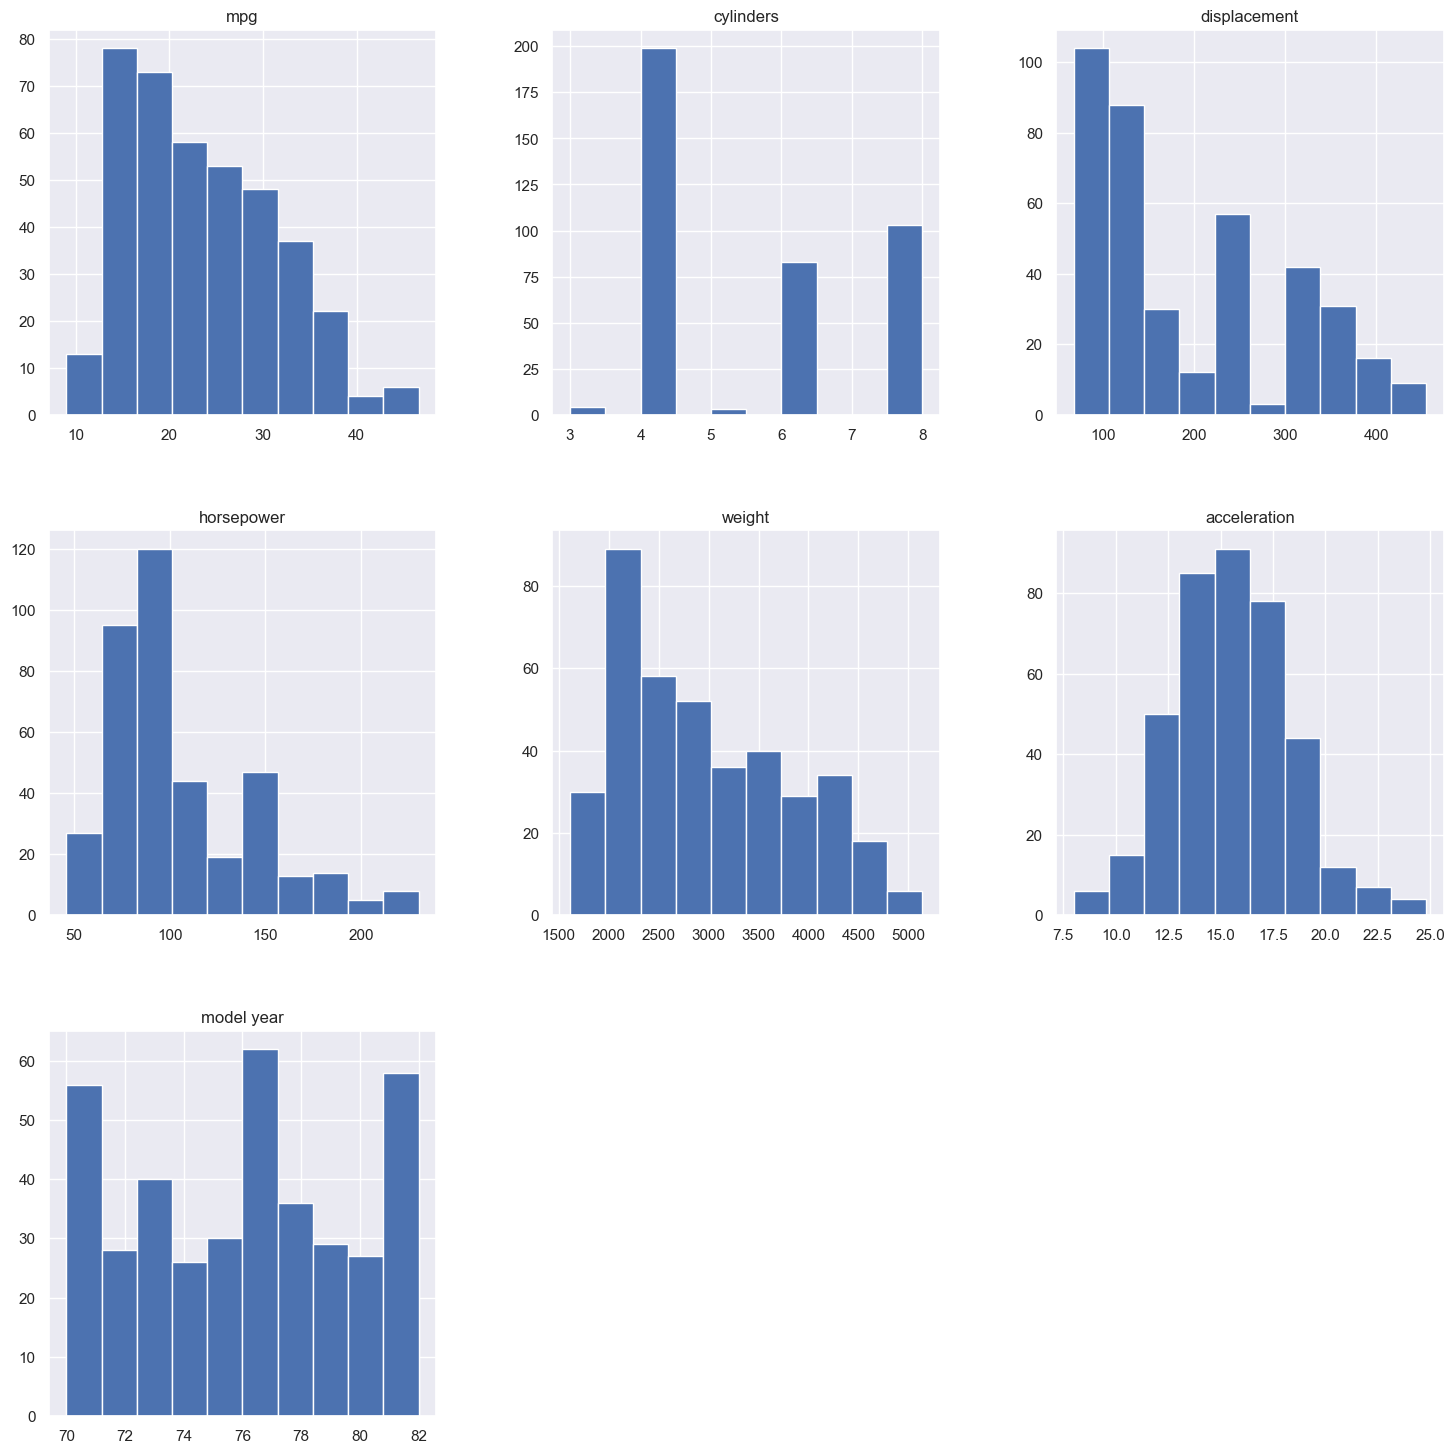

In [35]:

fig= data_1.hist(figsize = (18,18))

In [36]:
# univariate Analysis
data_1.mpg.describe()

count   392.00
mean     23.45
std       7.81
min       9.00
25%      17.00
50%      22.75
75%      29.00
max      46.60
Name: mpg, dtype: float64

<AxesSubplot:xlabel='mpg', ylabel='Density'>

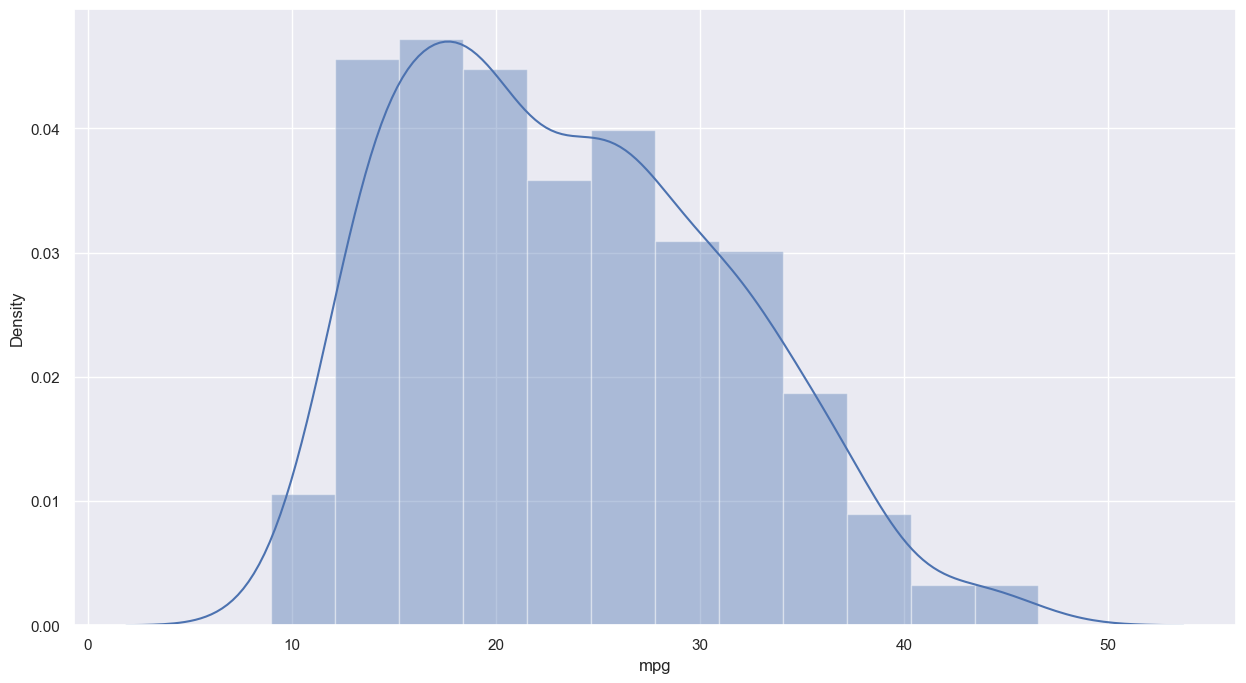

In [37]:
sns.distplot(data_1.mpg)

<function matplotlib.pyplot.show(close=None, block=None)>

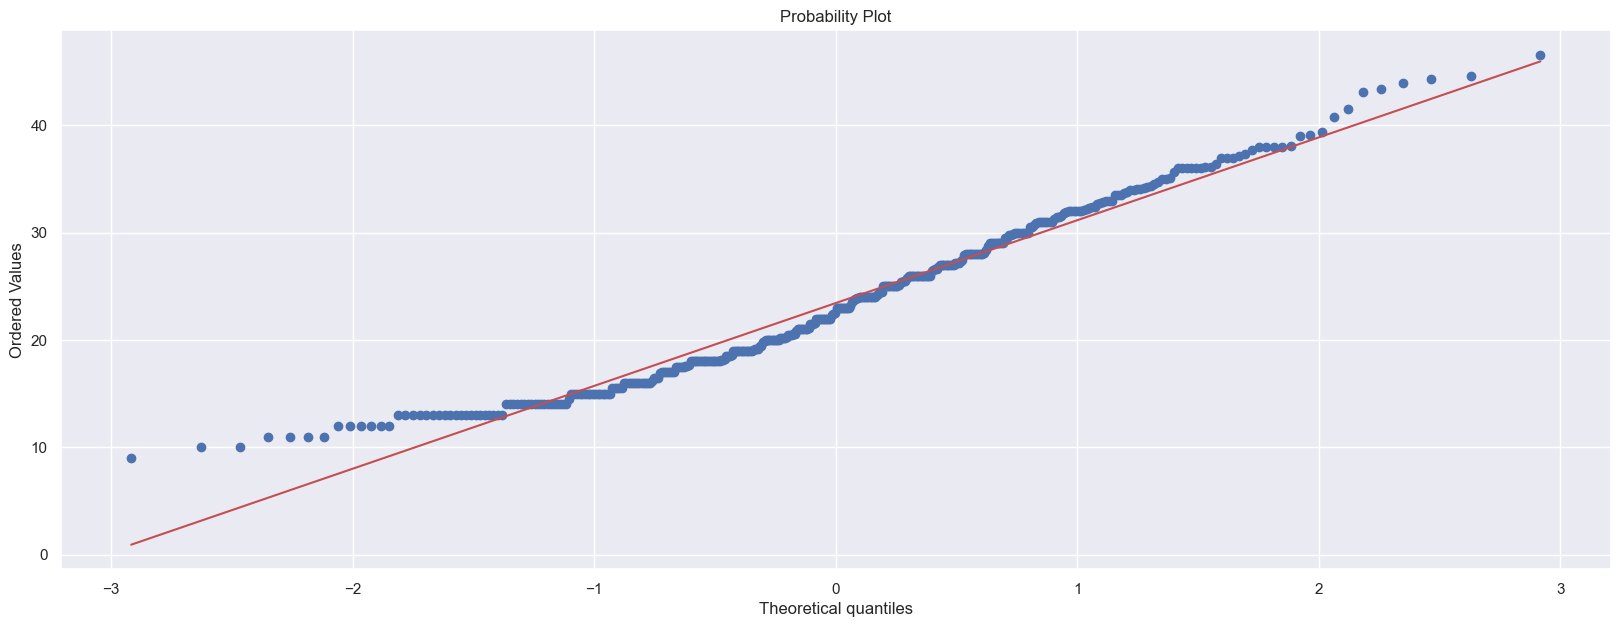

In [38]:
plt.figure(figsize = (20,7))
stats.probplot(data_1['mpg'], plot = plt)
plt.show

In [39]:
print("Skewness: %f" % data_1['mpg'].skew())

Skewness: 0.457092


# LOG- TRANFORMATION



In [40]:
data_2 = data_1.copy(deep = True)

In [41]:
data_2['log_mileage'] = np.log(data_2.mpg)

<AxesSubplot:xlabel='log_mileage', ylabel='Density'>

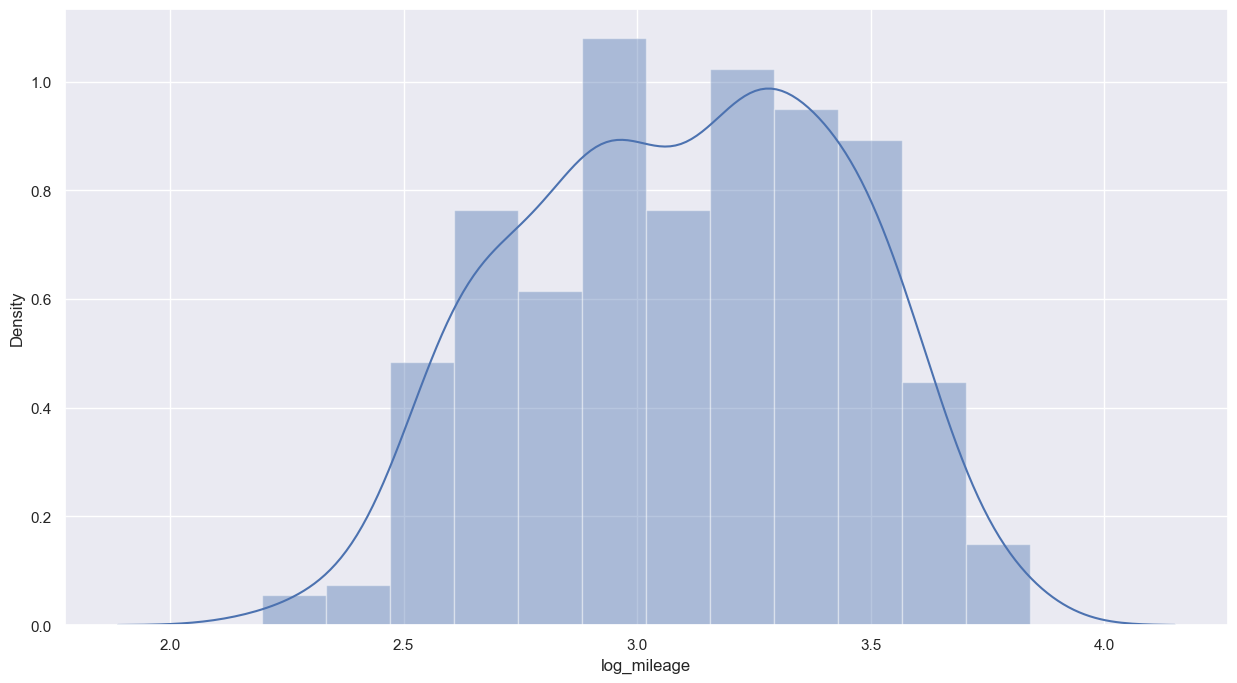

In [42]:
sns.distplot(data_2.log_mileage)

<function matplotlib.pyplot.show(close=None, block=None)>

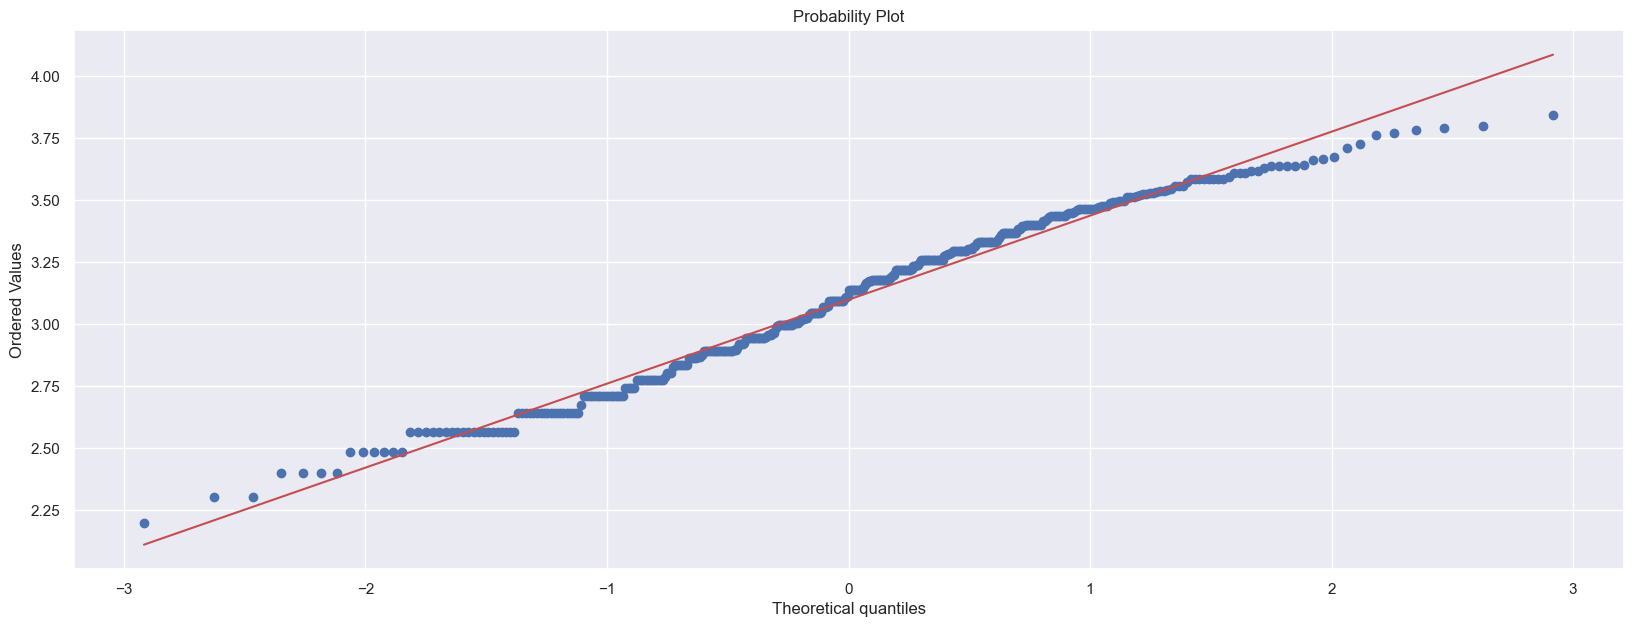

In [43]:
plt.figure(figsize = (20,7))
stats.probplot(data_2['log_mileage'], plot = plt)
plt.show

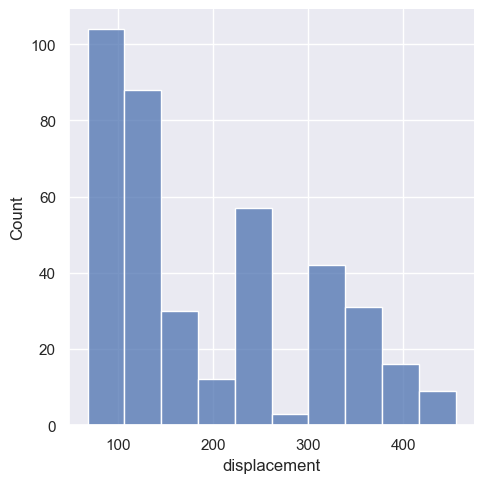

In [44]:
sns.displot(data_2.displacement)

<function matplotlib.pyplot.show(close=None, block=None)>

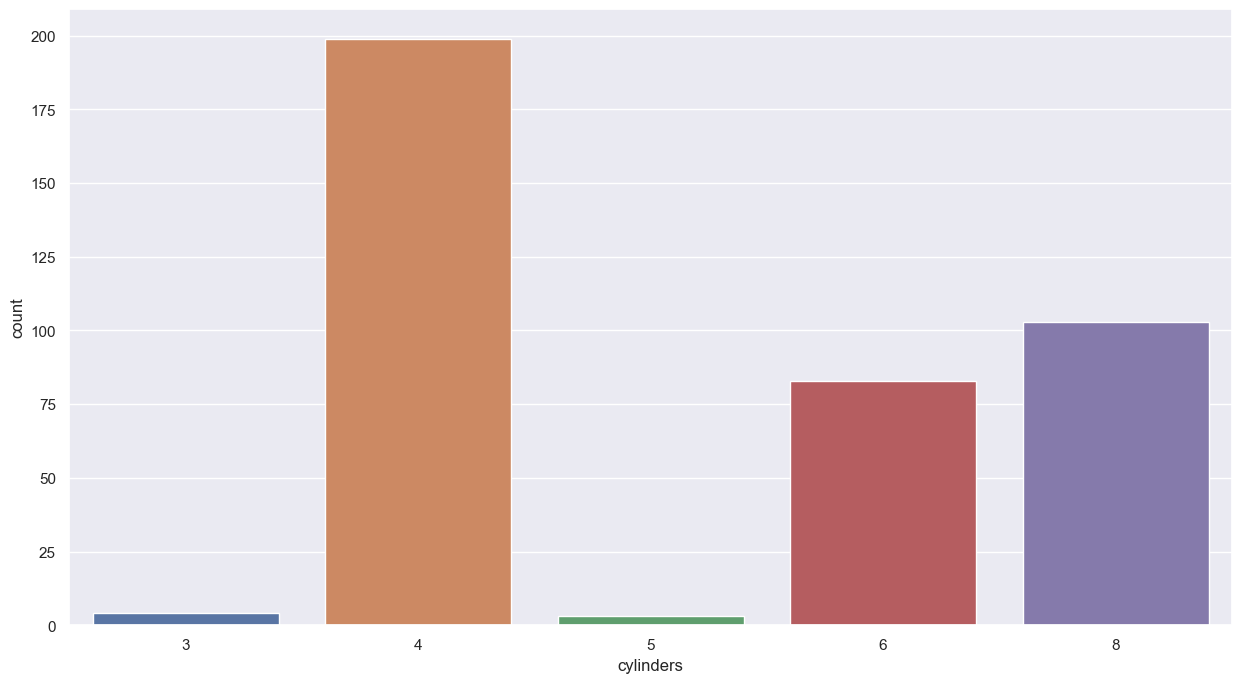

In [45]:
sns.countplot(data_2.cylinders, data= data_1)
plt.show

max => 4 cylindes
98% => 4,6,8


In [46]:
data_3 = data_2.copy(deep = True)

In [47]:
data_3.cylinders = data_3.cylinders.astype('object')

In [48]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    object 
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   Manufacture   392 non-null    object 
 9   Model         392 non-null    object 
 10  log_mileage   392 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 44.9+ KB


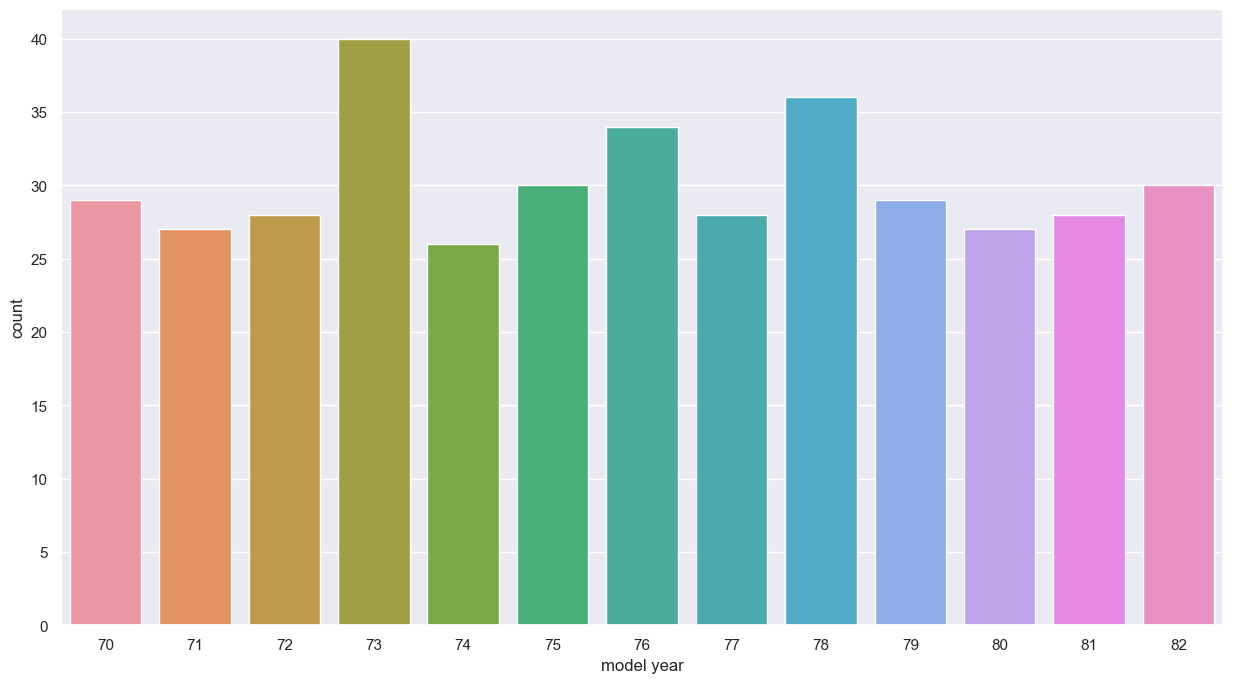

In [49]:
sns.countplot(data_3['model year'])
plt.show()

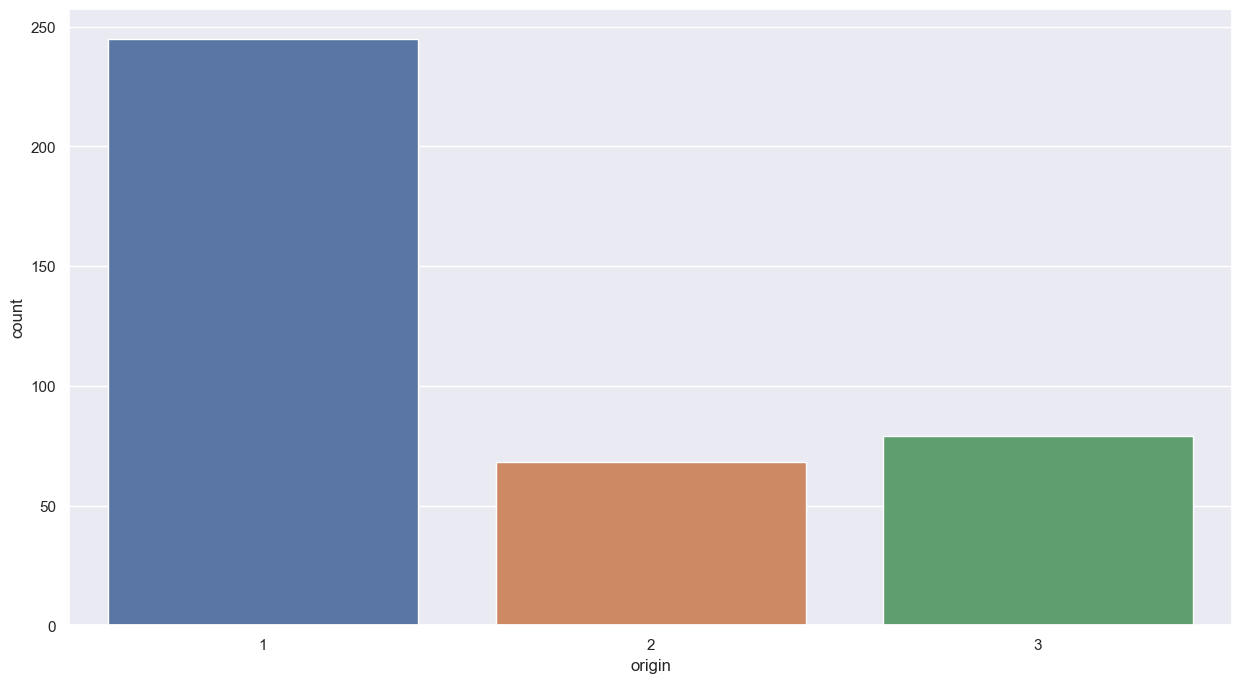

In [50]:
sns.countplot(data_3.origin)
plt.show()

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

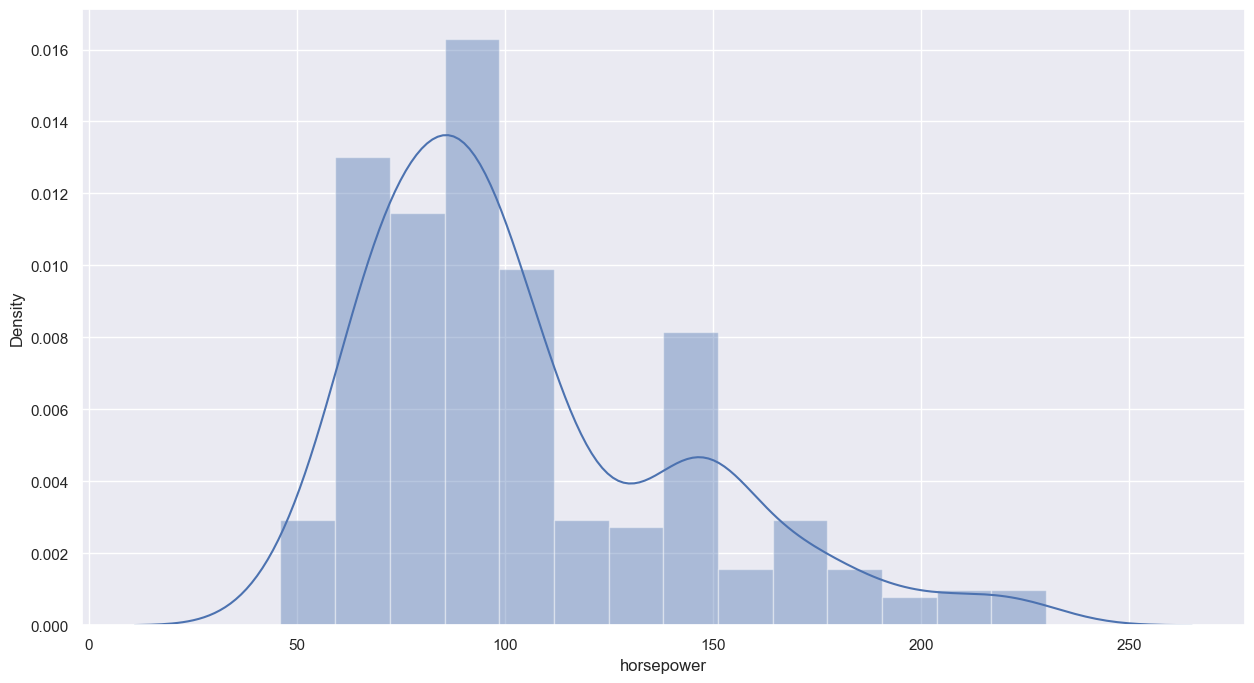

In [51]:
sns.distplot(data_3.horsepower)

# MULTIVARIATE ANALYSIS

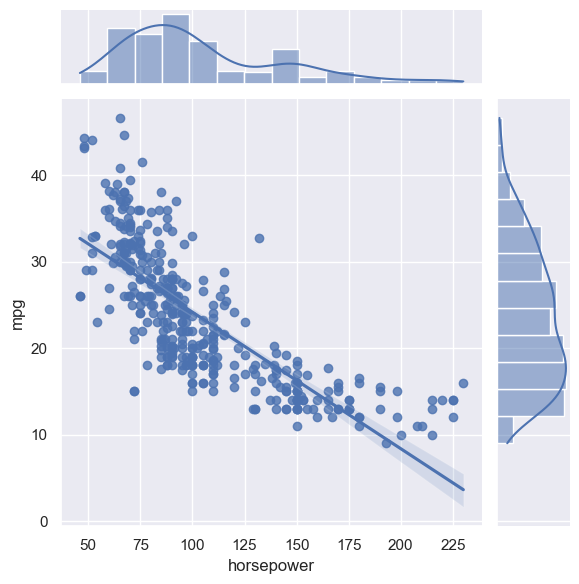

In [52]:

x= data_3[['mpg', 'horsepower']]
sns.jointplot(x.loc[:, 'horsepower'], x.loc[:, 'mpg'], kind= 'reg')

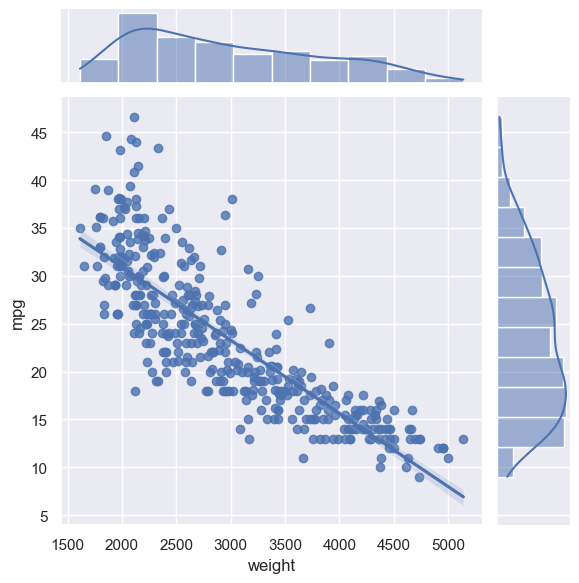

In [53]:
# kpl and weight
x= data_3[['mpg', 'weight']]
sns.jointplot(x.loc[:, 'weight'], x.loc[:, 'mpg'], kind= 'reg')

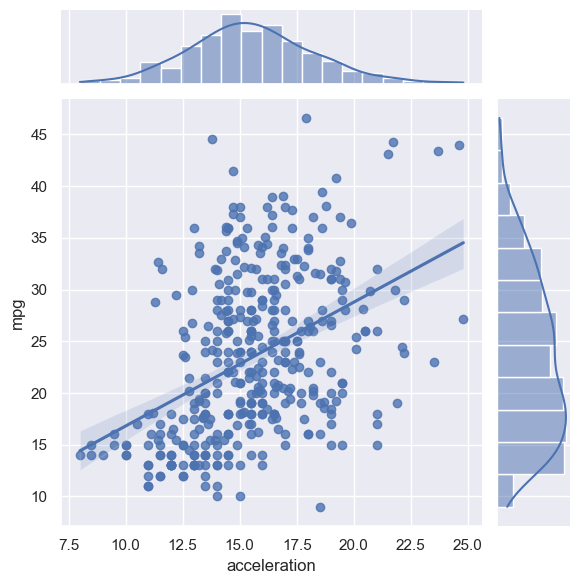

In [54]:
# kpl and acc

x= data_3[['mpg', 'acceleration']]
sns.jointplot(x.loc[:, 'acceleration'], x.loc[:, 'mpg'], kind= 'reg')

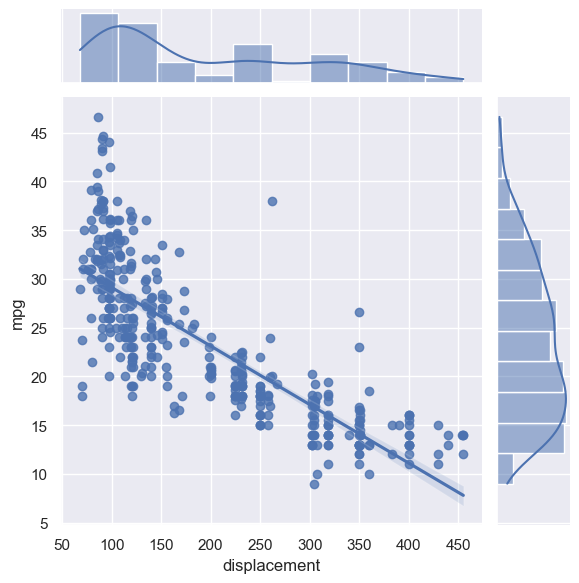

In [55]:
# kpl and dis
x= data_3[['mpg', 'displacement']]
sns.jointplot(x.loc[:, 'displacement'], x.loc[:, 'mpg'], kind= 'reg')

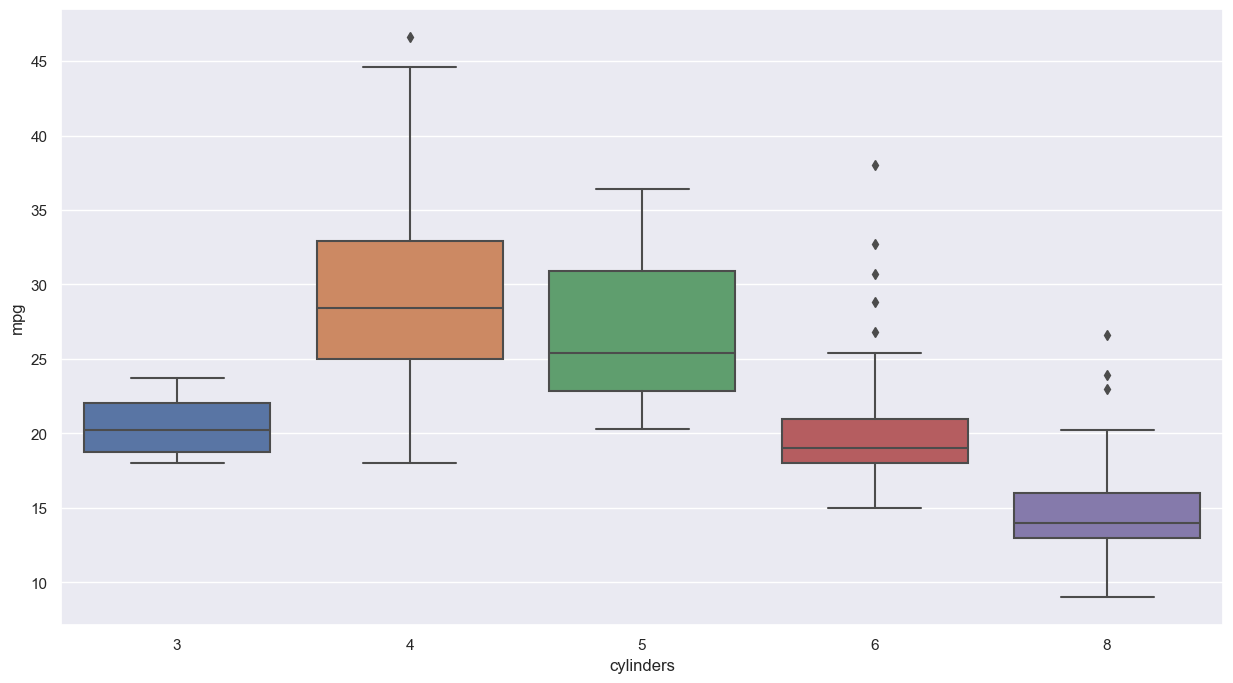

In [56]:
# kpl with cy
sns.boxplot(y = 'mpg', x= 'cylinders', data = data_3)
plt.show()

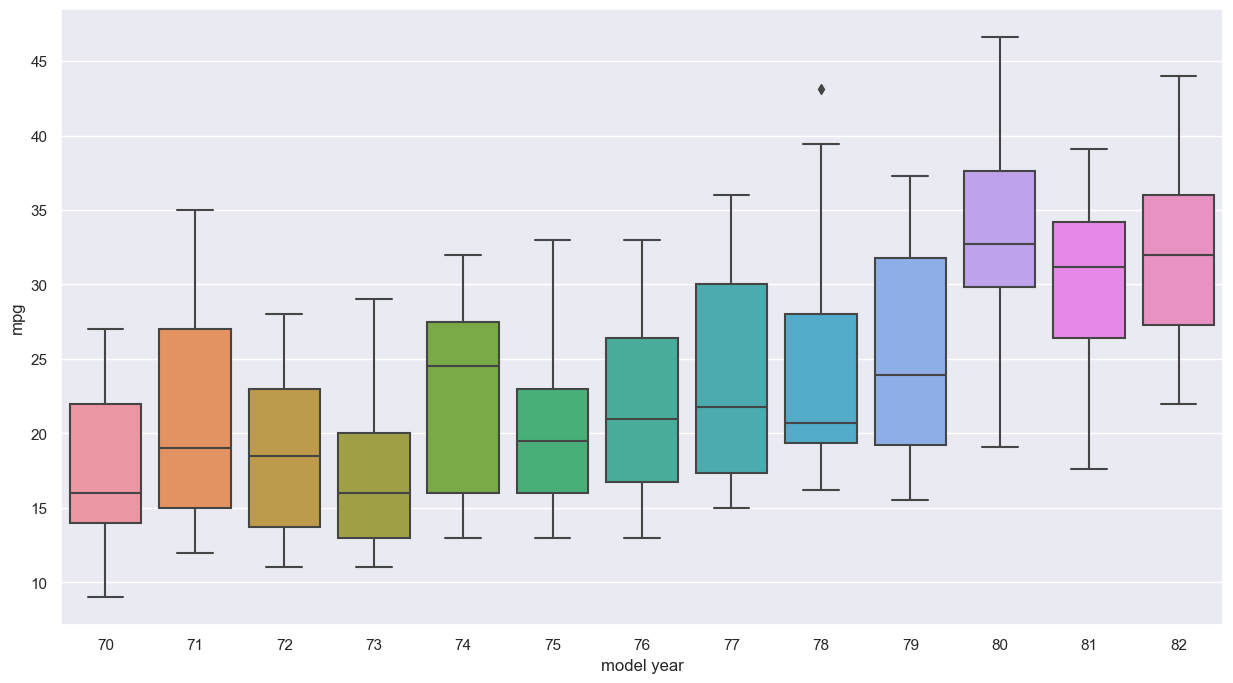

In [57]:
# kpl and yr

sns.boxplot(y = 'mpg', x= 'model year', data = data_3)
plt.show()

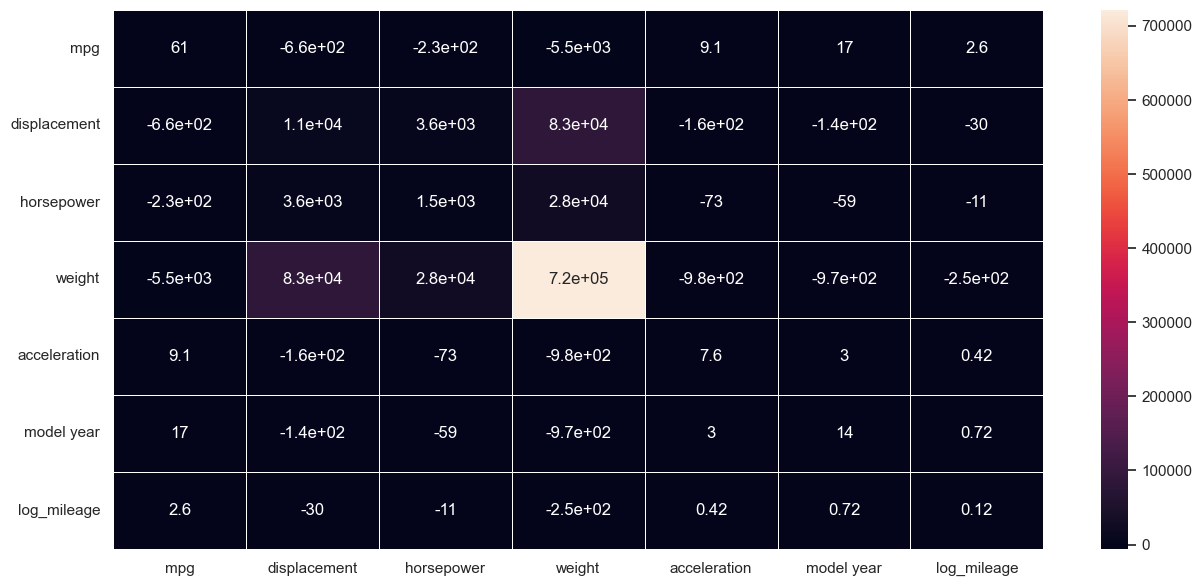

In [58]:
# Covariance
plt.figure(figsize = (15,7))
sns.heatmap(data_3.cov(), annot = True, linewidth = 0.5)
plt.show()

In [60]:
# Correlation

data_num = data_3.drop(['mpg', 'log_mileage', 'origin'], axis = 1)
corr = data_num.corr()
corr

,displacement,horsepower,weight,acceleration,model year
displacement,1.00,0.90,0.93,-0.54,-0.37
horsepower,0.90,1.00,0.86,-0.69,-0.42
weight,0.93,0.86,1.00,-0.42,-0.31
acceleration,-0.54,-0.69,-0.42,1.00,0.29
model year,-0.37,-0.42,-0.31,0.29,1.00


<AxesSubplot:>

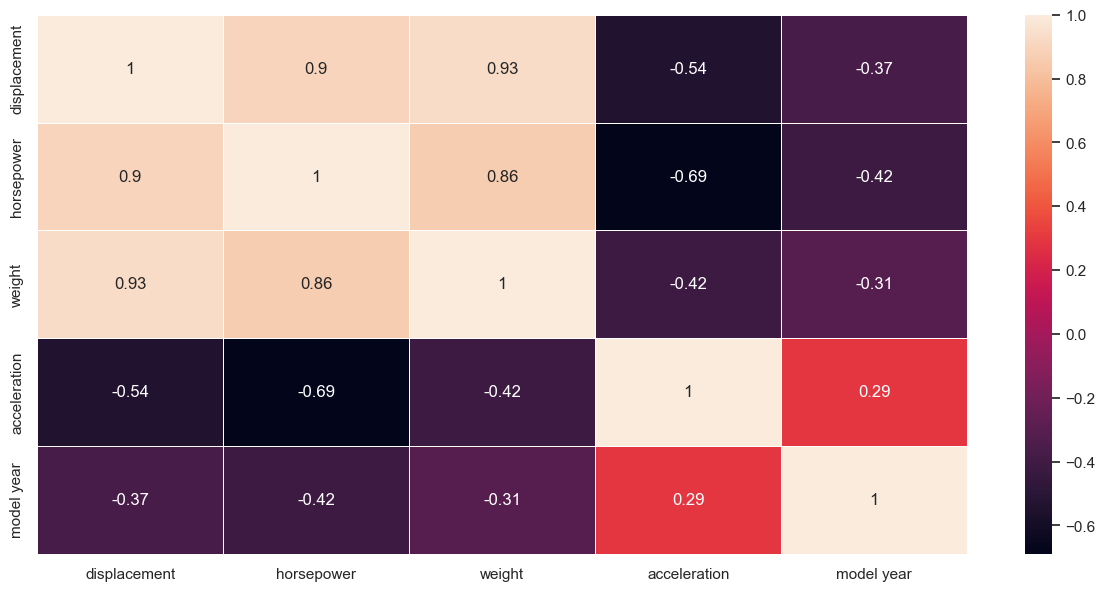

In [61]:
f,ax = plt.subplots(figsize = (15,7))
sns.heatmap(data_num.corr(), annot = True, linewidth = 0.5)

In [62]:
drop_list = [ 'weight', 'displacement', 'Manufacture', 'Model']
data_clean = data_3.drop(drop_list, axis = 1)
data_clean.head()

,mpg,cylinders,horsepower,acceleration,model year,origin,log_mileage
0,18.00,8,130.00,12.00,70,1,2.89
1,15.00,8,165.00,11.50,70,1,2.71
2,18.00,8,150.00,11.00,70,1,2.89
3,16.00,8,150.00,12.00,70,1,2.77
4,17.00,8,140.00,10.50,70,1,2.83


In [63]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    object 
 2   horsepower    392 non-null    float64
 3   acceleration  392 non-null    float64
 4   model year    392 non-null    int64  
 5   origin        392 non-null    object 
 6   log_mileage   392 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 32.6+ KB


# LABEL ENCODING

In [65]:
data_dummy = pd.get_dummies(data_clean, drop_first = True)
data_dummy.head()

,mpg,horsepower,acceleration,model year,log_mileage,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_2,origin_3
0,18.00,130.00,12.00,70,2.89,0,0,0,1,0,0
1,15.00,165.00,11.50,70,2.71,0,0,0,1,0,0
2,18.00,150.00,11.00,70,2.89,0,0,0,1,0,0
3,16.00,150.00,12.00,70,2.77,0,0,0,1,0,0
4,17.00,140.00,10.50,70,2.83,0,0,0,1,0,0


# STANDARDISE DATA

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
x = data_dummy.drop(['mpg','log_mileage' ], axis = 1)
x.head()

,horsepower,acceleration,model year,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_2,origin_3
0,130.00,12.00,70,0,0,0,1,0,0
1,165.00,11.50,70,0,0,0,1,0,0
2,150.00,11.00,70,0,0,0,1,0,0
3,150.00,12.00,70,0,0,0,1,0,0
4,140.00,10.50,70,0,0,0,1,0,0


In [69]:
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [70]:
x = scaler.fit_transform(x)


In [71]:
print(x)

[[0.45652174 0.23809524 0.         ... 1.         0.         0.        ]
 [0.64673913 0.20833333 0.         ... 1.         0.         0.        ]
 [0.56521739 0.17857143 0.         ... 1.         0.         0.        ]
 ...
 [0.20652174 0.21428571 1.         ... 0.         0.         0.        ]
 [0.17934783 0.63095238 1.         ... 0.         0.         0.        ]
 [0.19565217 0.67857143 1.         ... 0.         0.         0.        ]]


In [72]:
y = data_dummy.log_mileage

In [75]:

print(y)

0     2.89
1     2.71
2     2.89
3     2.77
4     2.83
      ... 
393   3.30
394   3.78
395   3.47
396   3.33
397   3.43
Name: log_mileage, Length: 392, dtype: float64


# SPLIT TRAIN AND TEST

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 10)

# LINEAR REGRESSION - OLS

In [77]:
# ols
from sklearn.linear_model import LinearRegression
OLS_model = LinearRegression()
OLS_model.fit(x_train, y_train)

LinearRegression()

In [78]:
y_pred_OLS = OLS_model.predict(x_test)

In [79]:
r_sq_OLS = OLS_model.score(x_train, y_train)
print("R_Squ_OLS: ", r_sq_OLS)
n = 313 # sample size
p = 9 # independent variable
adj_r_sq_OLS = 1- (1-r_sq_OLS)*(n-1)/(n-p-1)
print("Adj_R_Squ_OLS: ", adj_r_sq_OLS)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_OLS = sqrt(mean_squared_error(y_test, y_pred_OLS))
print("RMSE_OLS: ", rmse_OLS)

R_Squ_OLS:  0.8590484667691752
Adj_R_Squ_OLS:  0.8548617875642992
RMSE_OLS:  0.12884547136168126


# LINEAR REGRESSION -SGD

In [81]:
from sklearn.linear_model import SGDRegressor
SGD_model = SGDRegressor(loss = "squared_loss", alpha = 0.01, max_iter = 100000)
SGD_model.fit(x_train, y_train)

SGDRegressor(alpha=0.01, max_iter=100000)

In [82]:
y_pred_SGD = SGD_model.predict(x_test)

In [83]:
r_sq_SGD = SGD_model.score(x_train, y_train)
print("R_Squ_SGD: ", r_sq_SGD)
n = 313 # sample size
p = 9 # independent variable
adj_r_sq_SGD = 1- (1-r_sq_SGD)*(n-1)/(n-p-1)
print("Adj_R_Squ_SGD: ", adj_r_sq_SGD)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_SGD = sqrt(mean_squared_error(y_test, y_pred_SGD))
print("RMSE_SGD: ", rmse_SGD)

R_Squ_SGD:  0.6067437910653759
Adj_R_Squ_SGD:  0.5950629135722683
RMSE_SGD:  0.237504121720226
